### SIR Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

$$
\frac{dS}{dt}= -\beta I S \\
\frac{dI}{dt}= \beta I S -\gamma I\\
\frac{dR}{dt}= \gamma I \\
$$

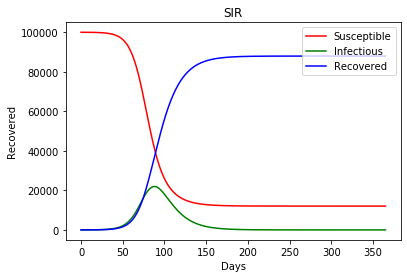

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def SIR(s,i,r,Ro,Tr,a,b,shift):


    #(Ro,Tr)=(5.,13.)
    (beta,gamma)=(Ro/Tr,1/Tr)

    def SIR_prime(t,sir):
        [s,i,r]=sir
        N=s+i+r
        return [-beta*i*s/N, beta*i*s/N-gamma*i,gamma*i]

    sol = solve_ivp(SIR_prime, [a, b], [s,i,r], dense_output=True)

    t = np.linspace(int(a+shift), int(b+shift), int(b-a))
    (s,i,r) = sol.sol(t)

    return [t,s,i,r]

#important part
Ro = 2.4
Tr = 12.9
start = 0.
end = 365.
shift=0.

s = 99990.0  # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end,shift)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SIR")
plt.xlabel("Days")
#plt.savefig('SIR Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SIR xy.png', dpi = 300)
#plt.show()


### SEIR Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

$$
\frac{dS}{dt}= -\beta I S \\
\frac{dE}{dt}= \beta I S -a E\\
\frac{dI}{dt}= a E -\gamma I\\
\frac{dR}{dt}= \gamma I \\
$$

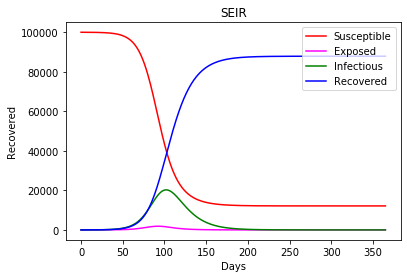

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def SEIR(s,e,i,r,Ro,Tr,Ta,a,b,shift):


    #(Ro,Tr)=(5.,13.)
    (alpha,beta,gamma)=(1/Ta,Ro/Tr,1/Tr)

    def SIR_prime(t,sir):
        [s,e,i,r]=sir
        N=s+e+i+r
        return [-beta*i*s/N, beta*i*s/N-alpha*e,alpha*e-gamma*i,gamma*i]

    sol = solve_ivp(SIR_prime, [a, b], [s,e,i,r], dense_output=True)

    #t = np.linspace(a+shift, b+shift, b-a)
    t = np.linspace(int(a+shift), int(b+shift), int(b-a))
    (s,e,i,r) = sol.sol(t)

    return [t,s,e,i,r]

#important part
Ro = 2.4
Tr = 12.9
Ta = 1.

start = 0.
end = 365.
shift = 0.

s = 99990.0  # Initial condition
e = 0.0        # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,epoints,ipoints,rpoints]=SEIR(s,e,i,r,Ro,Tr,Ta,start,end,shift)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
plt.plot(tpoints,epoints, color = 'magenta' , label='Exposed')
plt.ylabel("Exposed")
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SEIR")
plt.xlabel("Days")
#plt.savefig('SEIR Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SEIR xy.png', dpi = 300)
#plt.show()

## Pull data from Johns Hopkins CSSE repository

In [3]:
#!git clone https://github.com/CSSEGISandData/COVID-19/
#!cd COVID-19
##git pull 

## Pull data from NYT Covid Data repository

In [4]:
#! git clone https://github.com/nytimes/covid-19-data
#!cd covid-19-data
#!git pull

## Import LIbraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
import warnings
warnings.filterwarnings("ignore")

## Get Covid-19 Data by Country

In [6]:
def get_covid19(df,nation,pop):
    #print(df[0][[((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]])
    #I=df[0][(((df['Country/Region']==nation)|(df['Province/State']==nation)))]
    #D=df[1][((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]
    #R=df[2][((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]
    I2=df[0][(df[0]['Country/Region']==nation)]
    R2=df[2][(df[0]['Country/Region']==nation)]
    D2=df[1][(df[0]['Country/Region']==nation)]
    #I=df[0]
    #D=df[1]
    #R=df[2]
    #I.sum().T[4:].plot(label='Infected: {:,.0f}'.format(I.sum()[-1]),color='#1f77b4')
    #I.sum().T[4:].plot(logy=True,label=nation+': {:,.0f}'.format(I.sum()[-1]))
    #print(I.columns[4:])
    #print(I.sum().T[4:].index)

    #Countries
    #pop*=1.e-5
    I2=I2.sum().T[4:]
    R2=R2.sum().T[4:]
    D2=D2.sum().T[4:]
    #I2=np.subtract(I2,R2)
    #I2=np.subtract(I2,D2)
    I2=[I2/pop*1e5 for I2 in I2]
    I2=np.array(I2).T
    R2=[R2/pop*1e5 for R2 in R2]
    R2=np.array(R2).T
    D2=[D2/pop*1e5 for D2 in D2]
    D2=np.array(D2).T
    S2=[]
    for i in np.arange(len(I2)):
        S2.append(pop-I2[i]-R2[i]-D2[i])
    S2=[S2/pop*1e5 for S2 in S2]
    S2=np.array(S2).T
    E2=[]
    for i in np.arange(len(I2)):
        E2.append(100*D2[i]-I2[i]-R2[i])
    #E2=[E2/pop*1e5 for E2 in E2]
    E2=np.array(E2).T
    #States
    #I2=np.array(I.T[4:]).T[0]
    #print([S2,I2,R2,D2])
    return [S2,E2,I2,R2,D2]

## Get Covid-19 Data by State

In [7]:
def get_covid19_states2(df,state,pop):
    #print(df[0][[((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]])
    #I=df[0][(((df['Country/Region']==nation)|(df['Province/State']==nation)))]
    #D=df[1][((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]
    #R=df[2][((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]
    I2=df[0][(df[0]['Province_State']==state)][:-2]
    #R2=df[2][(df[0]['Province/State']==state)]
    D2=df[1][(df[0]['Province_State']==state)][:-2]
    #I=df[0]
    #D=df[1]
    #R=df[2]
    #I.sum().T[4:].plot(label='Infected: {:,.0f}'.format(I.sum()[-1]),color='#1f77b4')
    #I.sum().T[4:].plot(logy=True,label=nation+': {:,.0f}'.format(I.sum()[-1]))
    #print(I.columns[4:])
    #print(I.sum().T[4:].index)

    #Countries
    #pop*=1.e-5
    #print(I2.sum().T[11:])
    #I2=np.array(I2.sum().T[12:],dtype=float)
    I2=np.array(I2.T[12:-1].T.sum().T,dtype=float)
    #R2=R2.sum().T[12:]
    #D2=np.array(D2.sum().T[12:],dtype=float)
    D2=np.array(D2.T[12:-2].T.sum().T,dtype=float)
    #I2=np.subtract(I2,R2)
    #I2=np.subtract(I2,D2)
    I2=np.array(I2).T
    #R2=np.array(R2).T
    D2=np.array(D2).T
    S2=[]
    for i in np.arange(len(I2)):
        S2.append(pop-I2[i]-D2[i])
        #S2.append(pop-I2[i]-R2[i]-D2[i])
    #for i in np.arange(len(pop)):
    #    for j in np.arange(len(I2[i])):
    #        S2.append(pop[i]-I2[i][j]-D2[i][j])
    S2=np.array(S2).T
    E2=[]
    for i in np.arange(len(I2)):
            E2.append(100*D2[i]-I2[i])
    #for i in np.arange(len(pop)):
    #    for j in np.arange(len(I2[i])):
    #        E2.append(100*D2[i][j]-I2[i][j])
    E2=np.array(E2).T
    #S2=[S2/pop*1e5 for S2 in S2]
    #E2=[E2/pop*1e5 for E2 in E2]
    #I2=[I2/pop*1e5 for I2 in I2]
    ##R2=[R2/pop*1e5 for R2 in R2]
    #D2=[D2/pop*1e5 for D2 in D2]
    #States
    #I2=np.array(I.T[4:]).T[0]
    #print([S2,E2,I2,D2])
    return np.array([S2,E2,I2,D2])

def get_covid19_states(df,state,pop):
    I=df[(df['state']==state)]
    I2=I['cases']
    D=df[(df['state']==state)]
    D2=D['deaths']
    #D2=df[1][(df[0]['Country/Region']==nation)]

    #Countries
    #pop*=1.e-5
    #I2=I2.sum().T[4:]
    #R2=R2.sum().T[4:]
    #D2=D2.sum().T[4:]
    #I2=np.subtract(I2,R2)
    #I2=np.subtract(I2,D2)
    I2=np.array(I2).T
    #R2=np.array(R2).T
    D2=np.array(D2).T
    S2=[]
    for i in np.arange(len(D2)):
        S2.append(pop-I2[i]-D2[i])
        #S2.append(pop-I2[i]-R2[i]-D2[i])
    #for i in np.arange(len(pop)):
    #    for j in np.arange(len(I2[i])):
    #        S2.append(pop[i]-I2[i][j]-D2[i][j])
    S2=np.array(S2).T
    E2=[]
    for i in np.arange(len(I2)):
        E2.append(100*D2[i]-I2[i])
    E2=np.array(E2).T
    #S2=[S2/pop*1e5 for S2 in S2]
    #E2=[E2/pop*1e5 for E2 in E2]
    #I2=[I2/pop*1e5 for I2 in I2]
    #R2=[R2/pop*1e5 for R2 in R2]
    #D2=[D2/pop*1e5 for D2 in D2]
    #States
    #I2=np.array(I.T[4:]).T[0]
    #print([S2,I2,R2,D2])
    return np.array([S2,E2,I2,D2],dtype=float)

## Get Covid-19 Data by County


In [8]:
def get_covid19_counties(df,state,pop):
    I=df[((df['county']==state)&(df['state']=='Idaho'))]
    I2=I['cases']
    D=df[((df['county']==state)&(df['state']=='Idaho'))]
    D2=D['deaths']
    #D2=df[1][(df[0]['Country/Region']==nation)]

    #Countries
    #pop*=1.e-5
    #I2=I2.cumsum()
    #R2=R2.sum()
    #D2=D2.cumsum()
    #I2=np.subtract(I2,R2)
    I2=np.subtract(I2,D2)
    #I2=[I2/pop*1e5 for I2 in I2]
    I2=np.array(I2).T
    #R2=[R2/pop*1e5 for R2 in R2]
    #R2=np.array(R2).T
    #D2=[D2/pop*1e5 for D2 in D2]
    D2=np.array(D2).T
    S2=[]
    for i in np.arange(len(I2)):
        S2.append(pop-I2[i]-D2[i])
        #S2.append(pop-I2[i]-R2[i]-D2[i])
    #S2=[S2/pop*1e5 for S2 in S2]
    S2=np.array(S2).T
    E2=[]
    for i in np.arange(len(I2)):
        E2.append(100*D2[i]-I2[i])
    #E2=[E2/pop*1e5 for E2 in E2]
    E2=np.array(E2).T
    #States
    #I2=np.array(I.T[4:]).T[0]
    #print([S2,I2,R2,D2])
    return [S2,E2,I2,D2]

## Plot Data

In [9]:
def plot_covid19_states(ax,data,titles,state,pop):
    [S,E,I,D]=data
    #(c,n)=np.shape(I)
    x=np.arange(len(I))
    #y, x = np.mgrid[0:c, 0:n]
    #print(np.shape(x),np.shape(np.reshape(data[2],(c,n))))
    for i in np.arange(2,3):
        #print(data)
        #for j in np.arange(c):
        #    title=titles[j]
        #    plt.plot(x[j],data[i][j],label=title+' '+': {:,.0f}'.format(data[i][j][-1]))
        #    #plt.semilogy(x[j],data[i][j],label=title+' '+': {:,.0f}'.format(data[i][j][-1]))
        #plt.semilogy(x,data[i],'.',basey=10,label=state+' '+': {:,.0f}'.format(data[i][-1]))
        #plt.semilogy(x,data[i],'.',basey=10,label=state+' '+': {:,.0f}'.format(data[i][:-1]))
        plt.plot(x,data[i],'.',label=state+' '+': {:,.0f}'.format(data[i][-1]))
        #plt.xlim(0,100)
        #plt.ylim(1e-2,1e2)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        #plt.title('COVID-19 Cases per 100,000'+' by County')
        #plt.ylabel('COVID-19 Cases per 100,000')
        #plt.title('COVID-19 Cases'+' by County')
        plt.title('COVID-19 Cases'+' by State')
        #plt.ylabel('COVID-19 Cases per 100,000')
        plt.ylabel('COVID-19 Cases')
        ax.grid(which='minor',alpha=0.25)
        ax.grid(which='major',alpha=0.5)

## Fit to Exponential Using LMFit

In [10]:
def exp_fit_covid(Ro,Tr,data,start,end,shift,extend):
    import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit
        
    p = lmfit.Parameters()
    #p.add_many( ('a', 1., True),('b', 0.1, True),('c', 0., True),)
    p.add_many( 
               #('a1', data[0][-1], True),('b1', Ro, True),('c1', start, True),('d1', 0., True),
               #('a2', data[1][-1], True),('b2', Ro, True),('c2', start, True),('d2', 0., True),
               ('a3', data[2][-1], True),('Ro', Ro, True,0),('Tr', Tr, False,0),('c3', start, True),('d3', 0., True),
               #('a4', data[3][-1], True),('b4', Ro, True),('c4', start, True),('d4', 0., True),
               #('a5', data[4][-1], True),('b5', Ro, True),('c5', start, True),('d5', 0., True),
              )
    
#    def residual(p,x=None,S=None,I=None,D=None):
    def residual(p):
        v = p.valuesdict()
        resid=[
               #(v['a1'] * np.exp((x - v['c1'])* v['b1']) + v['d1'] - S),#*np.sqrt(S),
               #(v['a2'] * np.exp((x - v['c2'])* v['b2']) + v['d2'] - E),#*np.sqrt(S),
               (v['a3'] * np.exp((x - v['c3'])*(v['Ro']-1)/v['Tr']) + v['d3'] - I),#*np.sqrt(S),
               #(v['a4'] * np.exp((x - v['c4'])* v['b4']) + v['d4'] - R),#*np.sqrt(S),
               #(v['a5'] * np.exp((x - v['c5'])* v['b5']) + v['d5'] - D),#*np.sqrt(S),
              ]
        resid=np.array(resid)
        return resid.flatten()
       
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,D]=data
    x=np.arange(start+shift,end+shift)
    #print(np.size(x),np.size(data),np.size(I))
        
    #x=np.arange(48,58)
    #popt, pcov = curve_fit(exp, x[start:end], I2[start:end], p0=[1.,0.3,0.], maxfev=10000)
    #popt, pcov = curve_fit(exp, x[start:end], I2[start:end], p0=[1.,0.3,0.])
    #perr = np.sqrt(np.abs(np.diag(pcov)))
                
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')
    mi = mini.minimize(method='Nelder')
    mi   = mini.minimize(method='leastsq', params=mi.params)
    #mi   = mini.minimize(method='leastsq')

    #mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit',maxfev=2000)
    #mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')
    #mi = lmfit.minimize(residual, p, nan_policy='omit')

    print(' BIC: ',mi.bic,' Exp: '+mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr,end='')
    #lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)
    #print(lmfit.fit_report(mi))
    #print('-------------------------------')
    #print('Parameter    Value       Stderr')
    #for name, param in mi.params.items():
    #    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))
    #    print(lmfit.fit_report(mi))

    v = mi.params
    x=np.arange(start+shift,end+shift+extend)
    ipoints=lambda x : v['a3'] * np.exp((x - v['c3'])*(v['Ro']-1)/v['Tr']) + v['d3']
    plt.plot(x,ipoints(x),'-',label=r'Ro: %3.2f $\pm$ %3.2f'% (mi.params['Ro'],mi.params['Ro'].stderr))
    #v = mi.params
    #[tpoints,epoints,ipoints,rpoints]=SIR(v['s'],v['i'],v['r'],v['Ro'],v['Tr'],v['start'],v['end']+extend,v['shift'])
    #plt.plot(tpoints,ipoints,'-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    #plt.plot(x, residual(mi.params)+I, '-',label='b3: %3.2f'% tuple([mi.params['b3']]))
    #plt.plot(x, np.reshape(residual(mi.params),np.shape(data))[2]+I, '-',label='b3: %3.1f'% tuple([mi.params['b3']]))
    #plt.plot(x, np.reshape(residual(mi.params),np.shape(data))[3]+R, '-')
    #plt.plot(x, np.reshape(residual(mi.params),np.shape(data))[2]+R, '-',label='b3: %3.1f'% tuple([mi.params['b3']]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


## Fit to SIR Model using LMFit

https://lmfit.github.io/lmfit-py/

In [11]:
from scipy.integrate import solve_ivp

def SIR(s,i,r,Ro,Tr,a,b,shift):


    #(Ro,Tr)=(5.,13.)
    (beta,gamma)=(Ro/Tr,1/Tr)

    def SIR_prime(t,sir):
        [s,i,r]=sir
        #N=(1-shift)*s+shift*i+r
        N=s+shift*i+r
        return [
            -beta*i*s/N,
            beta*i*s/N-gamma*i,
            gamma*i
        ]

    sol = solve_ivp(SIR_prime, [a, b], [s,i,r],method='RK45', dense_output=True)

    t = np.linspace(int(a), int(b), int(b-a))
    (s,i,r) = sol.sol(t)

    return [t,s,shift*i,r]

def SIR_fit_covid(Ro,Tr,data,start,end,shift,extend):    
    #import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit

    [S,E,I,D]=data
    #important part
    #Ro = 5.1
    #Tr = 14.
    #start = 35
    #end = len(I)
    s = S[0]  # Initial condition
    i = I[0]  # Initial condition
    #r = R[0]  # Initial condition
    r=0
    d = D[0]
    
    p = lmfit.Parameters()
    p.add_many(('s', s, True),
            ('i', i, True),
            ('r', r, True),
            ('Ro', Ro, True),
            ('Tr', Tr, False),
            ('start', start, False),
            ('end', end, False),
            ('shift',shift, False),
            #('shift',shift, True,0,1),
        )
        
    def residual(p):
        v = p.valuesdict()
        [tpoints,spoints,ipoints,rpoints] = SIR(v['s'],v['i'],v['r'],v['Ro'],v['Tr'],v['start'],v['end'],v['shift'])
        #print(len(tpoints),len(spoints),len(ipoints),len(rpoints),len(S),len(I),len(R),)
        #print(len(tpoints),len(spoints),len(S),len(ipoints),len(I),len(rpoints),len(R),)
        #resid=[(spoints-S)/np.sqrt(S),(ipoints-I)/np.sqrt(I),(rpoints-R)/np.sqrt(R)]
        #if len(spoints) == len(S): 
        #    resid=[(spoints-S),(ipoints-I)]
        #elif len(spoints)<len(S): 
        #    resid=[(spoints-S[1:]),(ipoints-I[1:])]
        #else:
        #    resid=[(spoints[1:]-S),(ipoints[1:]-I)]
        resid=[(ipoints-I)]
        resid=np.array(resid)
        return resid.flatten()
                
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,D]=data
    x=np.arange(start,end)
    
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

    mi = mini.minimize(method='Nelder')
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)
    mi   = mini.minimize(method='leastsq', params=mi.params)
    #mi   = mini.minimize(method='leastsq')
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)
    print(' BIC: ',mi.bic,' SIR: ',mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr,
          mi.params['Tr'].name,mi.params['Tr'].value,mi.params['Tr'].stderr,
          mi.params['shift'].name,mi.params['shift'].value,mi.params['shift'].stderr,
          end='')
    
    v = mi.params
    [tpoints,epoints,ipoints,rpoints]=SIR(v['s'],v['i'],v['r'],v['Ro'],v['Tr'],v['start'],v['end']+extend,v['shift'])
    plt.plot(tpoints,ipoints,'-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    #plt.plot(x, np.reshape(residual(mi.params),[3,len(I)])[1]+I, '-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    #plt.plot(x, np.reshape(residual(mi.params),[3,len(R)])[2]+R, '-')#,label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Fit to SEIR Model using LMFit

In [12]:
from scipy.integrate import solve_ivp

def SEIR(s,e,i,r,Ro,Tr,Ta,a,b,shift):


    #(Ro,Tr)=(5.,13.)
    (alpha,beta,gamma)=(1/Ta,Ro/Tr,1/Tr)

    def SEIR_prime(t,seir):
        [s,e,i,r]=seir
        #N=(1-shift)*s+e+shift*i+r
        N=s+e+shift*i+r
        return [
            -beta*i*s/N,
            beta*i*s/N-alpha*e,
            alpha*e-gamma*i,gamma*i]

    sol = solve_ivp(SEIR_prime, [a, b], [s,e,i,r],method='RK45',dense_output=True)

    t = np.linspace(a, b, b-a)
    (s,e,i,r) = sol.sol(t)

    return [t,s,e,shift*i,r]

def SEIR_fit_covid(Ro,Tr,Ta,data,start,end,shift,extend):    
    #import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit

    [S,E,I,D]=data
    #important part
    #Ro = 5.1
    #Tr = 14.
    #Ta = 5.5
    
    #start = 35
    #end = len(I)
    s = S[0]  # Initial condition
    #e = E[0]  # Initial condition
    e = 0
    i = I[0]  # Initial condition
    #r = R[0]  # Initial condition
    r = 0
    d = D[0]
    
    p = lmfit.Parameters()
    p.add_many(('s', s, True),
            ('e', e, True),
            ('i', i, True),
            ('r', r, True),
            ('Ro', Ro, True),
            ('Tr', Tr, False),
            ('Ta', Ta, False),
            ('start', start, False),
            ('end', end, False),
            ('shift',shift, True),
            #('shift',shift, True,0,1),
        )
        
    def residual(p):
        v = p.valuesdict()
        [tpoints,spoints,epoints,ipoints,rpoints] = SEIR(v['s'],v['e'],v['i'],v['r'],v['Ro'],v['Tr'],v['Ta'],v['start'],v['end'],v['shift'])
        #print(len(tpoints),len(spoints),len(ipoints),len(rpoints),len(S),len(I),len(R),)
        #print(len(tpoints),len(spoints),len(S),len(ipoints),len(I),len(rpoints),len(R),)
        #resid=[(spoints-S)/np.sqrt(S),(ipoints-I)/np.sqrt(I),(rpoints-R)/np.sqrt(R)]
        if len(spoints) == len(S): 
            resid=[(spoints-S),(epoints-E),(ipoints-shift*I)]
        elif len(spoints)<len(S): 
            resid=[(spoints-S[1:]),(epoints-E[1:]),(ipoints-shift*I[1:])]
        else:
            resid=[(spoints[1:]-S),(epoints[1:]-E),(ipoints[1:]-shift*I)]
        resid=np.array(resid)
        return resid.flatten()
                
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,D]=data
    x=np.arange(start,end)
    
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

    mi = mini.minimize(method='Nelder')
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)
    mi   = mini.minimize(method='leastsq', params=mi.params)
    #mi   = mini.minimize(method='leastsq')

    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)
    #print(' BIC: ',mi.bic,' SEIR: ',mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr,mi.params['Tr'].name,mi.params['Tr'].value,mi.params['Tr'].stderr,mi.params['Ta'].name,mi.params['Ta'].value,mi.params['Ta'].stderr,end='')
    print(' BIC: ',mi.bic,' SEIR: ',mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr,
          mi.params['Tr'].name,mi.params['Tr'].value,mi.params['Tr'].stderr,
          mi.params['Ta'].name,mi.params['Ta'].value,mi.params['Ta'].stderr,
          mi.params['shift'].name,mi.params['shift'].value,mi.params['shift'].stderr,
          end='')

    v = mi.params
    [tpoints,spoints,epoints,ipoints,rpoints]=SEIR(v['s'],v['e'],v['i'],v['r'],v['Ro'],v['Tr'],v['Ta'],v['start'],v['end']+extend,v['shift'])
    plt.plot(tpoints,ipoints,'-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    #plt.plot(x, np.reshape(residual(mi.params),[4,len(I)])[2]+I, '-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    #plt.plot(x, np.reshape(residual(mi.params),[4,len(R)])[3]+R, '-')#,label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Fit to SIR Model using LMFit and project 75%-25% mitigation

In [13]:
def SIR_tmax(s,i,r,Ro,Tr):
    import scipy.integrate as integrate
    N=s+i+r
    tmax=integrate.quad(lambda x: N*Tr/Ro/x/(N-r+N/Ro*(np.log(x))-s*x), N/Ro/s, 1.)
    return tmax

def SIR_imax(s,i,r,Ro,Tr):
    N=s+i+r
    imax=i/N+s/N-(1+np.log(Ro*s/N))/Ro
    return imax*N

def SIR_project_covid(Ro,Tr,data,start,end,shift,extend,pop):    
    #import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit

    [S,E,I,D]=data
    #important part
    #Ro = 5.1
    #Tr = 14.
    #start = 35
    #end = len(I)
    s = S[0]  # Initial condition
    i = I[0]  # Initial condition
    #r = R[0]  # Initial condition
    r=0
    d = D[0]

    p = lmfit.Parameters()
    p.add_many(('s', s, True,0,pop),
            ('i', i, True,0),
            ('r', r, True,0),
            ('Ro', Ro, True,0,2.3),
            ('Tr', Tr, False),
            ('start', start, False),
            ('end', end, False),
            ('shift',shift, False),
            #('shift',shift, True,0,1),
        )
        
    def residual(p):
        v = p.valuesdict()
        [tpoints,spoints,ipoints,rpoints] = SIR(v['s'],v['i'],v['r'],v['Ro'],v['Tr'],v['start'],v['end'],v['shift'])
        #print(len(tpoints),len(spoints),len(ipoints),len(rpoints),len(S),len(I),len(R),)
        #print(len(tpoints),len(spoints),len(S),len(ipoints),len(I),len(rpoints),len(R),)
        #resid=[(spoints-S)/np.sqrt(S),(ipoints-I)/np.sqrt(I),(rpoints-R)/np.sqrt(R)]
        if len(spoints) == len(S): 
            resid=[(ipoints-I)]
            #resid=[(spoints-S),(ipoints-I)]
        elif len(spoints)<len(S): 
            resid=[(ipoints-I)]
            #resid=[(spoints-S),(ipoints-I)]
        else:
            resid=[(ipoints[1:]-I)]
            #resid=[(spoints[1:]-S),(ipoints[1:]-I)]
        #resid=[(ipoints-I)]
        resid=np.array(resid)
        return resid.flatten()
       
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,D]=data
    x=np.arange(start+shift,end+shift)
    #print(np.size(x),np.size(data),np.size(I))
        
    #x=np.arange(48,58)
    #popt, pcov = curve_fit(exp, x[start:end], I2[start:end], p0=[1.,0.3,0.], maxfev=10000)
    #popt, pcov = curve_fit(exp, x[start:end], I2[start:end], p0=[1.,0.3,0.])
    #perr = np.sqrt(np.abs(np.diag(pcov)))
                
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')
    mi = mini.minimize(method='Nelder')
    mi   = mini.minimize(method='leastsq', params=mi.params)
    #mi   = mini.minimize(method='leastsq')

    #mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit',maxfev=2000)
    #mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')
    #mi = lmfit.minimize(residual, p, nan_policy='omit')

    print(' BIC: ',mi.bic,' SIR: '+mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr)
    #lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)
    #print(lmfit.fit_report(mi))
    #print('-------------------------------')
    #print('Parameter    Value       Stderr')
    #for name, param in mi.params.items():
    #    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))
    #    print(lmfit.fit_report(mi))
    
    Ros = []
    Trs = []
    tm=[]
    im=[]
    v = mi.params
    #(s,i,r)=(S[-1],I[-1],0)

    Ro=v['Ro'].value
    Tr=v['Tr'].value
    (s,i,r)=(v['s'],v['i'],v['r'])
    [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end,shift)
    plt.plot(tpoints,ipoints,'-',)
    
    (s,i,r)=(spoints[-1],ipoints[-1],rpoints[-1])

    Ro=2.3
    Tr=v['Tr'].value
    [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,end,end+extend,shift)
    plt.plot(tpoints,ipoints,'-',label='Ro: %3.1f(no mitigation)'% tuple([Ro]))
    Ros.append(Ro)
    Trs.append(Tr)
    tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
    im.append(SIR_imax(s,i,r,Ro,Tr))

    Ro=v['Ro'].value
    Tr=v['Tr'].value
    [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,end,end+extend,shift)
    #plt.plot(tpoints,ipoints,'-',)
    plt.plot(tpoints,ipoints,'-',label='Ro: %3.2f'% tuple([Ro]))
    Ros.append(Ro)
    Trs.append(Tr)
    tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
    im.append(SIR_imax(s,i,r,Ro,Tr))

#     Ro=0.75*v['Ro'].value
#     [tpoints,epoints,ipoints,rpoints]=SIR(s,i,r,Ro,v['Tr'],end,end+extend,shift)
#     plt.plot(tpoints,ipoints,'-',label='0.75 Ro: %3.2f'% tuple([Ro]))
#     Ros.append(Ro)
#     Trs.append(Tr)
#     tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
#     im.append(SIR_imax(s,i,r,Ro,Tr))

    
#     Ro=0.5*v['Ro'].value
#     [tpoints,epoints,ipoints,rpoints]=SIR(s,i,r,Ro,v['Tr'],end,end+extend,shift)
#     plt.plot(tpoints,ipoints,'-',label='0.50 Ro: %3.2f'% tuple([Ro]))
#     Ros.append(Ro)
#     Trs.append(Tr)
#     tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
#     im.append(SIR_imax(s,i,r,Ro,Tr))

#     Ro=0.25*v['Ro'].value
#     [tpoints,epoints,ipoints,rpoints]=SIR(s,i,r,Ro,v['Tr'],end,end+extend,shift)
#     plt.plot(tpoints,ipoints,'-',label='0.25 Ro: %3.2f'% tuple([Ro]))
#     Ros.append(Ro)
#     Trs.append(Tr)
#     tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
#     im.append(SIR_imax(s,i,r,Ro,Tr))

    #plt.plot(x, np.reshape(residual(mi.params),[3,len(I)])[1]+I, '-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    #plt.plot(x, np.reshape(residual(mi.params),[3,len(R)])[2]+R, '-')#,label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    data = {
    r'$R_0$':Ros,
    r'$T_r$':Trs,
    r'$\frac{T_r}{R_0}$':np.array(Trs)/np.array(Ros),
    r'$t_{max}$':tm,
    r'$I_{max}$':im,
    }
    import pandas as pd
    pd.options.display.float_format = '{:,.1f}'.format
    df = pd.DataFrame(data, index=['no mitigation','Ro'])
    #df = pd.DataFrame(data, index=['no mitigation','Ro','0.75 Ro','0.5 Ro','0.25 Ro'])
    #df = pd.DataFrame(data, index=['Ro','0.75 Ro','0.5 Ro','0.25 Ro'])
    #df.index.name=title
    
    return df


## Important Part

--Specify dataset, path, datafiles, model, range to fit and execute. 

--Select Country.

--Save Output to Files.

In [14]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

def covid19_states(states,starts):
    %matplotlib inline
    import sys

    if sys.platform=='darwin': 
        path1='/Volumes/GoogleDrive/My Drive/Research/github/'

    elif sys.platform=='win32': 
        path1='G:/My Drive/Research/github/'

    elif sys.platform=='linux2': 
        path1='~/'
    else: 
        path1=''

    #path2=path1+'covid-19-data/'
    path2=path1+'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
    #path2=path1+'archived_data/archived_time_series/'

    files=[
    #    'us-states.csv',
    #    'us-counties.csv',
        'time_series_covid19_confirmed_US.csv',
    #    'time_series_covid19_recovered_US.csv',
        'time_series_covid19_deaths_US.csv',
    #    'time_series_covid19_confirmed_global.csv',
    #    'time_series_covid19_recovered_global.csv',
    #    'time_series_covid19_deaths_global.csv',
    #    'time_series_19-covid-Confirmed_archived_0325.csv',
    #    'time_series_19-covid-Recovered_archived_0325.csv'
    #    'time_series_19-covid-Deaths_archived_0325.csv',
    ]

    import pandas as pd

    #df_pop=pd.read_csv(path2+'state_populations.csv', lineterminator='\r',header=None)
    #df_pop=pd.read_excel(path2+'state_populations.xlsx')
    #df_pop=pd.read_excel(path2+'state_populations.xlsx',header=None)
    #df_pop=pd.read_csv(path1+'idaho-covid-response/statewide-data/IdahoPopulations2018.csv')
    df_pop=pd.read_csv(path1+'COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')
    #print(df_pop)

    df=[]
    for file in files:
        df_index=pd.read_csv(path2+file)
        df.append(df_index)
    #df=pd.read_csv(path2+files[0])
    #df=[]
    #for state in states:
    #    df_index=df_states[(df_states['state']==state)]
    #    df.append(df_index)

    #start=np.repeat(15,len(states))
    #start=[0,0,0]

    #titles=['Susceptible','Infected','Recovered','Dead']
    titles=['Susceptible','Exposed','Infected','Dead']

    Ro=2.8
    Tr=12.9
    Ta=1.

    import numpy as np
    import matplotlib.pyplot as plt
    def color_alpha():
        fig=plt.figure();
        fig, ax = plt.subplots(figsize=(10,6));
        n=(1+3)
        plt.gca().set_prop_cycle(
            color=['r']*n+['g']*n+['b']*n+['c']*n+['m']*n+['y']*n+['k']*n+['aqua']*n+['orange']*n+['grey']*n,
            alpha=list(np.linspace(.25,0.75,n))*10
        )
        return ax

    ax=color_alpha()
    df_c=[]
    for i in np.arange(len(states)): 
        #ax=color_alpha()
        if isinstance(states,list): 
            state=states[i]
            start=starts[i]
        elif isinstance(states,str):
            state=states
            start=starts
        #print(state,states)
        #pop=(df_pop[(df_pop['Province_State']==state)]['Population'].values[3:])
        #titles=(df_pop[(df_pop['Province_State']==state)]['Admin2'].values[3:])
        #print(df_pop)
        #print(df_pop[(df_pop['Province_State']==state)])
        #print(df_pop[(df_pop['Province_State']==state)]['Population'].values[0])
        pop=int(df_pop[(df_pop['Province_State']==state)]['Population'].values[0])
        #pop=df_pop[(df_pop[0]==state)][1].values[0]
        #pop=pop[0]
        #print(df_pop[(df_pop['county']==state+' County')]['est72018sex0_age999'].values[0])
        #pop=df_pop[(df_pop['county']==state+' County')]['est72018sex0_age999'].values[0]
        #print(state,pop,end=' ')
        #data=get_covid19_counties(df,state,pop)
        data=get_covid19_states2(df,state,pop)
        #print(state,pop.sum(),data[2].sum(),end=' ')
        print(state,pop,data[2][-1],end=' ')
        extend=60
        if len(data[0]) >= 4:
            plot_covid19_states(ax,data,titles,state,pop)
            #SIR_fit_covid(Ro,Tr,data,start[i],len(data[0]),1,0)
            df_c.append(SIR_project_covid(Ro,Tr,data,start,len(data[0]),1,extend,pop))  
            df_c[-1].index.name=state
            #SEIR_fit_covid(Ro,Tr,Ta,data,0,len(data[0]),1,extend) 
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ##plt.show()
        #plt.savefig('COVID-19 Coronavirus '+state+'.png',bbox_inches='tight')
        #plt.savefig('COVID-19 Coronavirus '+nation+'.pdf',bbox_inches='tight')
        #plt.show()

    #plt.show()
    plt.savefig('COVID-19 Coronavirus States Projection'+'.png',bbox_inches='tight')
    plt.show()
    
    return(df_c)
    #multi_table(df_c)

def covid19_state(states,starts):
    %matplotlib inline
    import sys

    if sys.platform=='darwin': 
        path1='/Volumes/GoogleDrive/My Drive/Research/github/'

    elif sys.platform=='win32': 
        path1='G:/My Drive/Research/github/'

    elif sys.platform=='linux2': 
        path1='~/'
    else: 
        path1=''

    #path2=path1+'covid-19-data/'
    path2=path1+'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
    #path2=path1+'archived_data/archived_time_series/'

    files=[
    #    'us-states.csv',
    #    'us-counties.csv',
        'time_series_covid19_confirmed_US.csv',
    #    'time_series_covid19_recovered_US.csv',
        'time_series_covid19_deaths_US.csv',
    #    'time_series_covid19_confirmed_global.csv',
    #    'time_series_covid19_recovered_global.csv',
    #    'time_series_covid19_deaths_global.csv',
    #    'time_series_19-covid-Confirmed_archived_0325.csv',
    #    'time_series_19-covid-Recovered_archived_0325.csv'
    #    'time_series_19-covid-Deaths_archived_0325.csv',
    ]

    import pandas as pd

    #df_pop=pd.read_csv(path2+'state_populations.csv', lineterminator='\r',header=None)
    #df_pop=pd.read_excel(path2+'state_populations.xlsx')
    #df_pop=pd.read_excel(path2+'state_populations.xlsx',header=None)
    #df_pop=pd.read_csv(path1+'idaho-covid-response/statewide-data/IdahoPopulations2018.csv')
    df_pop=pd.read_csv(path1+'COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')
    #print(df_pop)

    df=[]
    for file in files:
        df_index=pd.read_csv(path2+file)
        df.append(df_index)
    #df=pd.read_csv(path2+files[0])
    #df=[]
    #for state in states:
    #    df_index=df_states[(df_states['state']==state)]
    #    df.append(df_index)

    #start=np.repeat(15,len(states))
    #start=[0,0,0]

    #titles=['Susceptible','Infected','Recovered','Dead']
    titles=['Susceptible','Exposed','Infected','Dead']

    Ro=2.8
    Tr=12.9
    Ta=1.

    import numpy as np
    import matplotlib.pyplot as plt
    def color_alpha():
        fig=plt.figure();
        fig, ax = plt.subplots(figsize=(10,6));
        n=(1+3)
        plt.gca().set_prop_cycle(
            color=['r']*n+['g']*n+['b']*n+['c']*n+['m']*n+['y']*n+['k']*n+['aqua']*n+['orange']*n+['grey']*n,
            alpha=list(np.linspace(.25,0.75,n))*10
        )
        return ax

    #ax=color_alpha()
    df_c=[]
    for i in np.arange(len(states)): 
        ax=color_alpha()
        if isinstance(states,list): 
            state=states[i]
            start=starts[i]
        elif isinstance(states,str):
            state=states
            start=starts
        #print(state,states)
        #pop=(df_pop[(df_pop['Province_State']==state)]['Population'].values[3:])
        #titles=(df_pop[(df_pop['Province_State']==state)]['Admin2'].values[3:])
        #print(df_pop)
        #print(df_pop[(df_pop['Province_State']==state)])
        #print(df_pop[(df_pop['Province_State']==state)]['Population'].values[0])
        pop=int(df_pop[(df_pop['Province_State']==state)]['Population'].values[0])
        #pop=df_pop[(df_pop[0]==state)][1].values[0]
        #pop=pop[0]
        #print(df_pop[(df_pop['county']==state+' County')]['est72018sex0_age999'].values[0])
        #pop=df_pop[(df_pop['county']==state+' County')]['est72018sex0_age999'].values[0]
        #print(state,pop,end=' ')
        #data=get_covid19_counties(df,state,pop)
        data=get_covid19_states2(df,state,pop)
        #print(state,pop.sum(),data[2].sum(),end=' ')
        print(state,pop,data[2][-1],end=' ')
        extend=60
        if len(data[0]) >= 4:
            plot_covid19_states(ax,data,titles,state,pop)
            #SIR_fit_covid(Ro,Tr,data,start[i],len(data[0]),1,0)
            df_c.append(SIR_project_covid(Ro,Tr,data,start,len(data[0]),1,extend,pop))  
            df_c[-1].index.name=state
            #SEIR_fit_covid(Ro,Tr,Ta,data,0,len(data[0]),1,extend) 
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ##plt.show()
        plt.savefig('COVID-19 Coronavirus '+state+'.png',bbox_inches='tight')
        plt.show()

    #plt.show()
    #plt.savefig('COVID-19 Coronavirus States Projection'+'.png',bbox_inches='tight')
    #plt.show()
    
    return(df_c)
    #multi_table(df_c)


### States

New York 19453561 362764.0  BIC:  649.2318980154664  SIR: Ro 1.3441013485121074 0.014115314719088827


<Figure size 432x288 with 0 Axes>

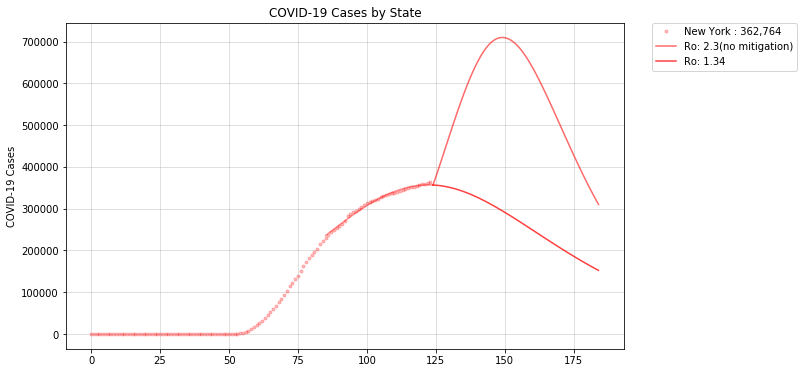

New Jersey 8882190 154866.0  BIC:  600.8932445367036  SIR: Ro 2.293052851584767 527.3931885506029


<Figure size 432x288 with 0 Axes>

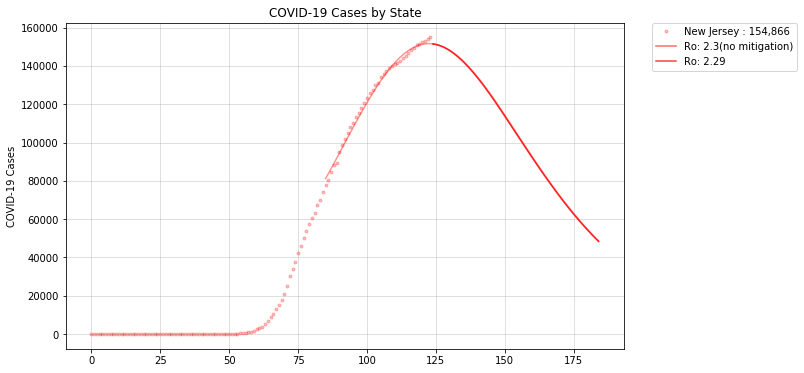

Washington 7614893 20003.0  BIC:  412.50541694555136  SIR: Ro 1.3308277109965703 0.4776578479415173


<Figure size 432x288 with 0 Axes>

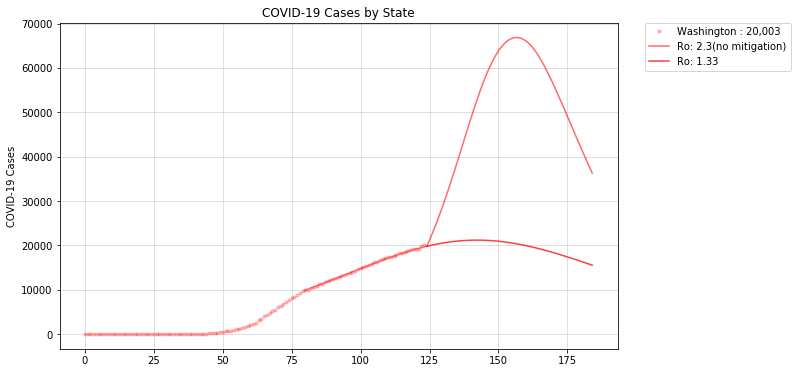

California 39512223 96400.0  BIC:  430.33711473457674  SIR: Ro 1.467834604467071 0.10693366140875693


<Figure size 432x288 with 0 Axes>

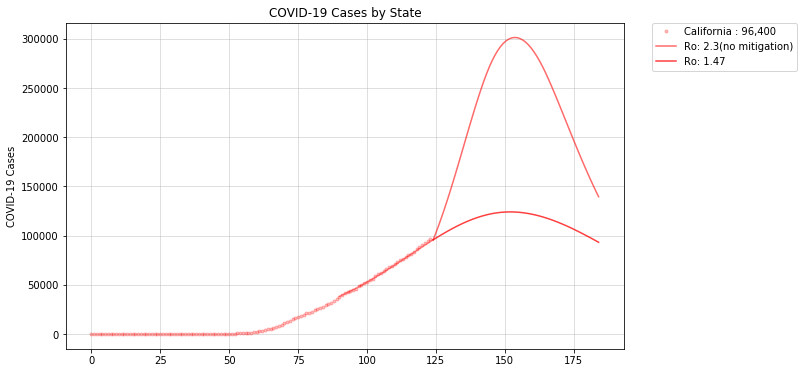

Oregon 4217737 3949.0  BIC:  518.7651504424292  SIR: Ro 1.4066760678401025 None


<Figure size 432x288 with 0 Axes>

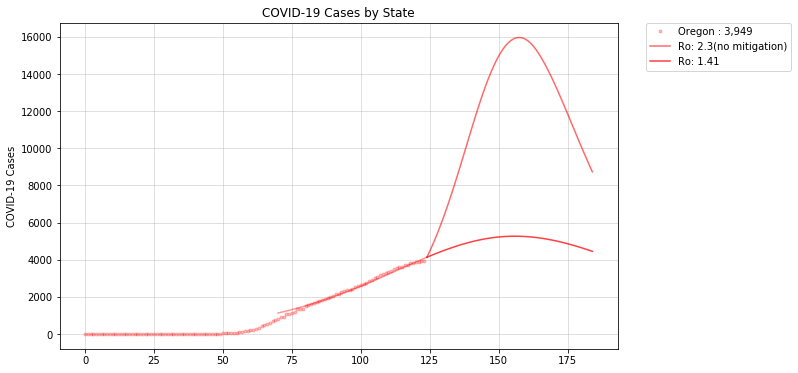

Idaho 1787065 2626.0  BIC:  366.0068619466065  SIR: Ro 1.3112491802233948 0.013800157651698333


<Figure size 432x288 with 0 Axes>

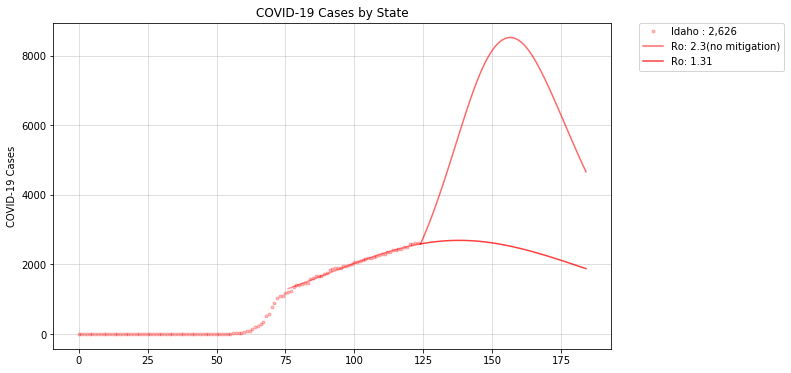

Texas 28995881 56409.0  BIC:  523.8114262054077  SIR: Ro 1.5586152392510104 0.01966183260797166


<Figure size 432x288 with 0 Axes>

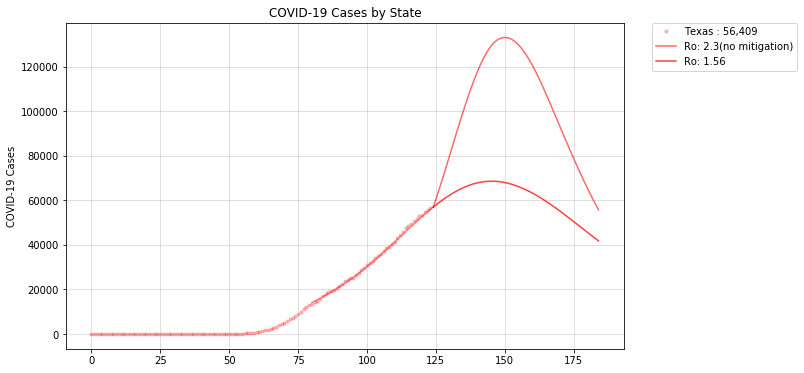

Maryland 6045680 47152.0  BIC:  549.5088427122654  SIR: Ro 1.7280271751375542 0.03229577246828424


<Figure size 432x288 with 0 Axes>

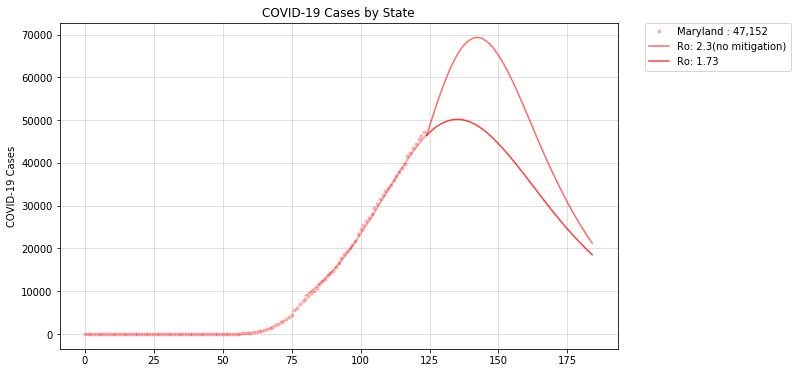

Virginia 8535519 37727.0  BIC:  602.4728924331637  SIR: Ro 1.8480410992576173 0.013871224962118725


<Figure size 432x288 with 0 Axes>

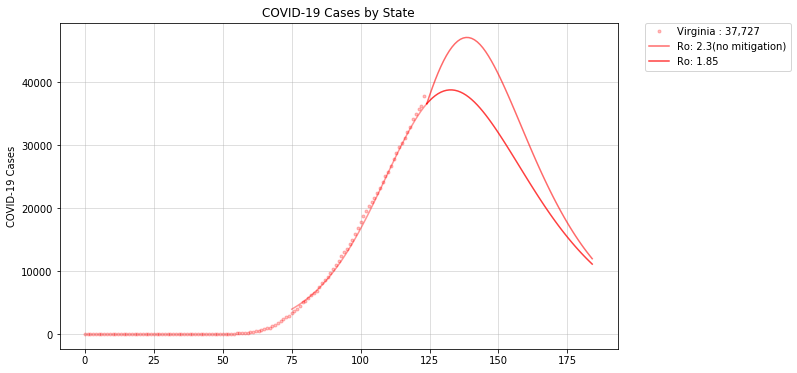

District of Columbia 705749 8225.0  BIC:  395.96225282529247  SIR: Ro 1.6912749188144804 0.044442924124970855


<Figure size 432x288 with 0 Axes>

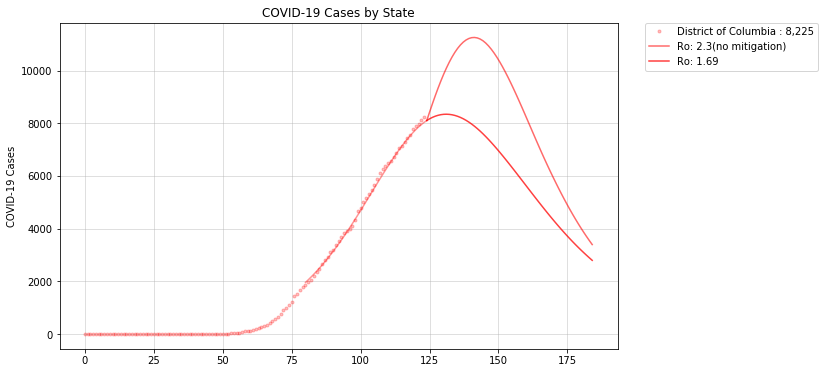

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
New York,,,,,
no mitigation,2.3,12.9,5.6,25.1,"710,191.3"
Ro,1.3,12.9,9.6,-1.7,"356,997.8"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
New Jersey,,,,,
no mitigation,2.3,12.9,5.6,-1.4,"151,597.5"
Ro,2.3,12.9,5.6,-1.6,"151,650.6"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Washington,,,,,
no mitigation,2.3,12.9,5.6,32.2,"66,766.7"


In [15]:
states=[
    'New York',
    'New Jersey',
#    'Louisiana',
    'Washington',
    'California',
#    'Florida',
#    'Colorado',
#    'Nevada',
    'Oregon',
#    'Utah',
    'Idaho',
#    'Montana',
#    'Wyoming',
#    'New Mexico',
    'Texas',
#    'Illinois',
#    'Massachusetts',
    'Maryland',
    'Virginia',
    'District of Columbia',
]

starts=[
    85,#'New York',
    85,#'New Jersey',
#    30,#'Louisiana',
    80,#'Washington',
    90,#'California',
#    35,#'Florida',
#    30,#'Colorado',
#    70,#'Nevada',
#    70,#'Utah',
    70,#'Oregon',
    76,#'Idaho',
#    30,#'Montana',
#    30,#'Wyoming',
#    30,#'New Mexico',
    80,#'Texas',
#    70,#'Illinois',
#    70,#'Massachusetts',
    80,#'Maryland',
    75,#'Virginia',
    80,#'District of Columbia',
]

df_c=covid19_state(states,starts)

multi_table(df_c)

Louisiana 4648794 37732.0  BIC:  521.7411872008017  SIR: Ro 1.5775957436551051 3738.5379050781066
Texas 28995881 56409.0  BIC:  523.8114262054077  SIR: Ro 1.5586152392510104 0.01966183260797166
Oklahoma 3956971 6090.0  BIC:  371.17828791011596  SIR: Ro 1.4578111020366902 0.012845015634807687


<Figure size 432x288 with 0 Axes>

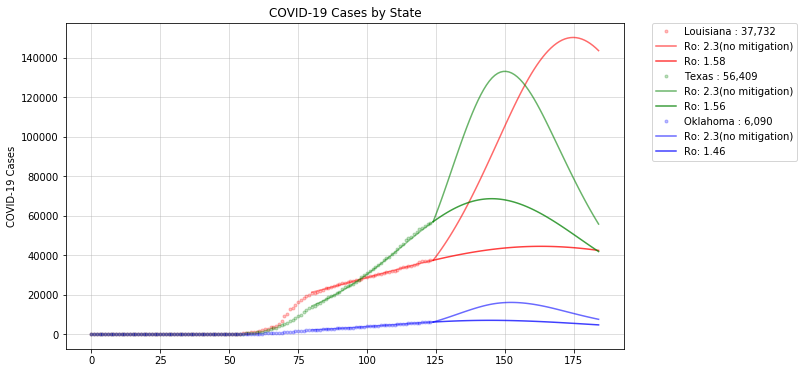

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Louisiana,,,,,
no mitigation,2.3,12.9,5.6,50.6,"150,108.4"
Ro,1.6,12.9,8.2,39.1,"44,422.5"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Texas,,,,,
no mitigation,2.3,12.9,5.6,26.0,"133,211.9"
Ro,1.6,12.9,8.3,21.2,"68,560.6"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Oklahoma,,,,,
no mitigation,2.3,12.9,5.6,28.2,"16,026.0"


In [16]:
states=[
#    'New York',
#    'New Jersey',
    'Louisiana',
#    'Washington',
#    'California',
#    'Florida',
#    'Colorado',
#    'Nevada',
#    'Oregon',
#    'Utah',
#    'Idaho',
#    'Montana',
#    'Wyoming',
#    'New Mexico',
    'Texas',
    'Oklahoma',
#    'Arkansas',
#    'Illinois',
#    'Massachusetts',
#    'Maryland',
#    'Virginia',
#    'District of Columbia',
]

starts=[
#    80,#'New York',
#    75,#'New Jersey',
    80,#'Louisiana',
#    80,#'Washington',
#    70,#'California',
#    35,#'Florida',
#    30,#'Colorado',
#    25,#'Nevada',
#    35,#'Oregon',
#    40,#'Utah',
#    75,#'Idaho',
#    30,#'Montana',
#    30,#'Wyoming',
#    30,#'New Mexico',
    80,#'Texas',
    80,#'Oklahoma',
#    80,#'Arkansas',
#    70,#'Illinois',
#    70,#'Massachusetts',
#    80,#'Maryland',
#    80,#'Virginia',
#    80,#'District of Columbia',
]

df_c=covid19_states(states,starts)
multi_table(df_c)

Maryland 6045680 47152.0  BIC:  549.5088427122654  SIR: Ro 1.7280271751375542 0.03229577246828424
Virginia 8535519 37727.0  BIC:  602.4728924331637  SIR: Ro 1.8480410992576173 0.013871224962118725
District of Columbia 705749 8225.0  BIC:  395.96225282529247  SIR: Ro 1.6912749188144804 0.044442924124970855


<Figure size 432x288 with 0 Axes>

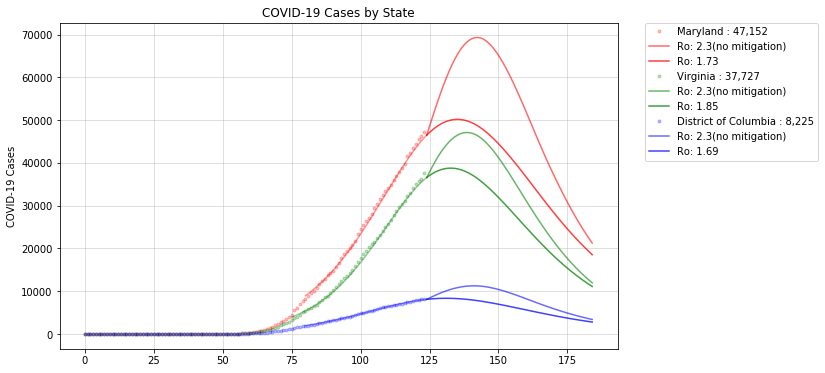

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Maryland,,,,,
no mitigation,2.3,12.9,5.6,18.1,"69,192.6"
Ro,1.7,12.9,7.5,11.1,"50,182.2"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Virginia,,,,,
no mitigation,2.3,12.9,5.6,14.3,"47,044.2"
Ro,1.8,12.9,7.0,8.7,"38,784.1"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
District of Columbia,,,,,
no mitigation,2.3,12.9,5.6,16.9,"11,234.1"


In [17]:
states=[
#    'New York',
#    'New Jersey',
#    'Louisiana',
#    'Washington',
#    'California',
#    'Florida',
#    'Colorado',
#    'Nevada',
#    'Oregon',
#    'Utah',
#    'Idaho',
#    'Montana',
#    'Wyoming',
#    'New Mexico',
#    'Texas',
#    'Oklahoma',
#    'Arkansas',
#    'Illinois',
#    'Massachusetts',
    'Maryland',
    'Virginia',
    'District of Columbia',
]

starts=[
#    80,#'New York',
#    75,#'New Jersey',
#    80,#'Louisiana',
#    80,#'Washington',
#    70,#'California',
#    35,#'Florida',
#    30,#'Colorado',
#    25,#'Nevada',
#    35,#'Oregon',
#    40,#'Utah',
#    75,#'Idaho',
#    30,#'Montana',
#    30,#'Wyoming',
#    30,#'New Mexico',
#    75,#'Texas',
#    75,#'Oklahoma',
#    80,#'Arkansas',
#    70,#'Illinois',
#    70,#'Massachusetts',
    80,#'Maryland',
    75,#'Virginia',
    80,#'District of Columbia',
]

df_c=covid19_states(states,starts)
multi_table(df_c)

Nevada 3080156 7956.0  BIC:  575.6221651938042  SIR: Ro 1.564516636948737 0.03141067668254072
Utah 3205958 8233.0  BIC:  506.07871262759033  SIR: Ro 1.6288709937264119 0.011026161465722762
Oregon 4217737 3949.0  BIC:  518.7651504424292  SIR: Ro 1.4066760678401025 None
Idaho 1787065 2626.0  BIC:  366.0068619466065  SIR: Ro 1.3112491802233948 0.013800157651698333


<Figure size 432x288 with 0 Axes>

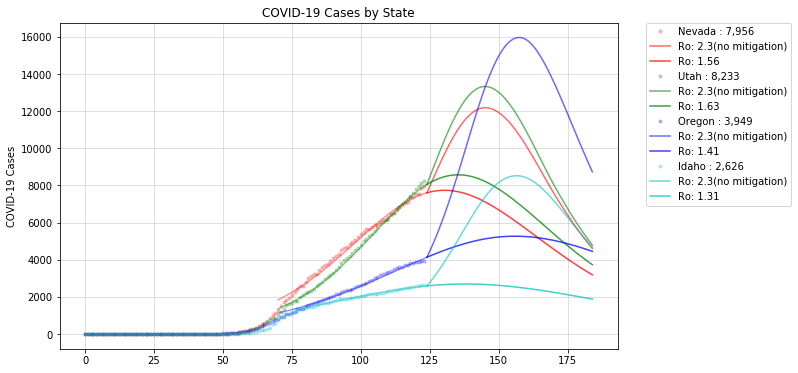

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Nevada,,,,,
no mitigation,2.3,12.9,5.6,21.1,"12,173.6"
Ro,1.6,12.9,8.2,6.4,"7,735.9"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Utah,,,,,
no mitigation,2.3,12.9,5.6,21.0,"13,318.9"
Ro,1.6,12.9,7.9,11.3,"8,570.0"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Oregon,,,,,
no mitigation,2.3,12.9,5.6,33.2,"15,917.8"


In [18]:
states=[
#    'New York',
#    'New Jersey',
#    'Louisiana',
#    'Washington',
#    'California',
#    'Florida',
#    'Colorado',
    'Nevada',
    'Utah',
    'Oregon',
    'Idaho',
#    'Montana',
#    'Wyoming',
#    'New Mexico',
#    'Texas',
#    'Oklahoma',
#    'Arkansas',
#    'Illinois',
#    'Massachusetts',
#    'Maryland',
#    'Virginia',
#    'District of Columbia',
]

starts=[
#    80,#'New York',
#    75,#'New Jersey',
#    80,#'Louisiana',
#    80,#'Washington',
#    70,#'California',
#    35,#'Florida',
#    30,#'Colorado',
    70,#'Nevada',
    70,#'Utah',
    70,#'Oregon',
    76,#'Idaho',
#    30,#'Montana',
#    30,#'Wyoming',
#    30,#'New Mexico',
#    75,#'Texas',
#    75,#'Oklahoma',
#    80,#'Arkansas',
#    70,#'Illinois',
#    70,#'Massachusetts',
#    80,#'Maryland',
#    80,#'Virginia',
#    80,#'District of Columbia',
]

df_c=covid19_states(states,starts)
multi_table(df_c)